/tmp/ipykernel_494547/3454537248.py:31: RuntimeWarning: invalid value encountered in true_divide
  w = ~np.isnan(rho/rhoprev)  # necessary because the last value of rho is zero.
/tmp/ipykernel_494547/3454537248.py:31: RuntimeWarning: invalid value encountered in true_divide
  w = ~np.isnan(rho/rhoprev)  # necessary because the last value of rho is zero.
/tmp/ipykernel_494547/3454537248.py:31: RuntimeWarning: invalid value encountered in true_divide
  w = ~np.isnan(rho/rhoprev)  # necessary because the last value of rho is zero.
/tmp/ipykernel_494547/3454537248.py:31: RuntimeWarning: invalid value encountered in true_divide
  w = ~np.isnan(rho/rhoprev)  # necessary because the last value of rho is zero.
/tmp/ipykernel_494547/3454537248.py:31: RuntimeWarning: invalid value encountered in true_divide
  w = ~np.isnan(rho/rhoprev)  # necessary because the last value of rho is zero.
/tmp/ipykernel_494547/3454537248.py:31: RuntimeWarning: invalid value encountered in true_divide
  w = ~np.isn

finished in 81 iterations.


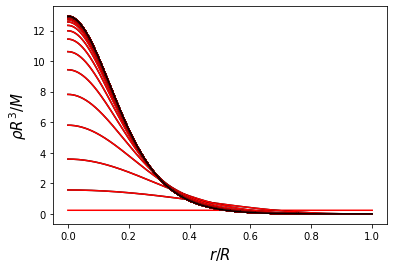

In [1]:
''' Polytrope solver by iteration.  This is faster and more intuitive than integrating the 
    Lane-Emden equation as described in most stellar structure textbooks, which requires matching boundary 
    conditions.  Here, you just use the fact that the the pressure is related to the difference in potential 
    between a point and the stellar surface: P(r) = const.(phi_s - phi(r))^(1/n).  Uses units R=M=G=1; 
    rescale as necessary.      Chris Matzner 2021 (written circa 2018). 
''' 
%matplotlib inline 
import numpy as np 
from scipy.integrate import simps, cumtrapz, trapz
# import scipy.io as io
import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# plt.style.use(['presentation'])

n = 3  # polytropic index (related to gamma_poly = 1 + 1/n)
N=10000  # radial grid points. 
tolerance = 1.e-19  # very strict tolerance on end result. 
r = np.linspace(0,1,N)+0.5/N
rho = r.copy()*0.+4*np.pi/3;  
rhoprev = rho +0.1
G = 1.  # keep symbol; value not important. 
keepgoing = 1 
i = 0 
while keepgoing: 
    m = cumtrapz(4*np.pi*r**2*rho,r,initial=0)  # Could switch to Simpson integrator for even greater accuracy

    mmax = np.max(m)  # normalize density and mass to unit mass. 
    rho = rho/mmax
    m = m/mmax

    w = ~np.isnan(rho/rhoprev)  # necessary because the last value of rho is zero. 
    error = np.max(np.abs(rho[w]/rhoprev[w]-1))
    keepgoing = (error > tolerance)

    plt.figure(2)
    if i: plt.plot(r,rhoprev,'r',r,rho,'k')
    
    g = -G*m/r**2
    Phi = cumtrapz(-g, r,initial=0)
    rhoprev = rho 
    rho = (np.max(Phi)-Phi)**n
    i +=1
plt.xlabel(r'$r/R$',fontsize=15)
plt.ylabel(r'$\rho R^3/M$', fontsize=15)

np.savetxt("polytrope_rho.txt", rho, delimiter=" ")
np.savetxt("polytrope_r.txt", r, delimiter=" ")

print('finished in {:n} iterations.'.format(i))